In [1]:
import matplotlib.pyplot as plt
from lib.DataWriter import DataWriter
inter_type = {
    0: 'Fourway',
    1: 'Traffic lights',
    2: 'Equivalent',
    4: 'Smart_lights'
}

In [2]:
def get_parameters(p_spawn=0.1, max_speed_horizontal=3, max_speed_vertical=3, intersection_type = 'Fourway'):
    t_traffic_light_cycle=5
    p_bend = 0.33
    p_u_turn = 0.01
    p_left = p_bend
    p_right = p_bend
    p_straight = p_bend
    t_from_north = t_traffic_light_cycle
    t_from_west = t_traffic_light_cycle
    t_from_east = t_traffic_light_cycle
    t_from_south = t_traffic_light_cycle


    parameters = {
        "max_speed_horizontal": max_speed_horizontal,
        "max_speed_vertical": max_speed_vertical,
        "alpha_factor": 5,
        "beta_factor": 2,
        "intersection_type": intersection_type,
        "t_from_north": t_from_north,
        "t_from_west": t_from_west,
        "t_from_east": t_from_east,
        "t_from_south": t_from_south,
        "p_car_spawn_north": p_spawn,
        "p_north_to_north": p_u_turn,
        "p_north_to_west": p_right,
        "p_north_to_east": p_left,
        "p_north_to_south": p_straight,
        "p_car_spawn_west": p_spawn,
        "p_west_to_north": p_left,
        "p_west_to_west": p_u_turn,
        "p_west_to_east": p_straight,
        "p_west_to_south": p_right,
        "p_car_spawn_east": p_spawn,
        "p_east_to_north": p_right,
        "p_east_to_west": p_straight,
        "p_east_to_east": p_u_turn,
        "p_east_to_south": p_left,
        "p_car_spawn_south": p_spawn,
        "p_south_to_north": p_straight,
        "p_south_to_west": p_left,
        "p_south_to_east": p_right,
        "p_south_to_south": p_u_turn,
    }
    return parameters


In [ ]:
import random 
fourway = []
traffic_lights = []
equivalent = []
smart_lights = []

for run_id in random.sample(range(1,10000),1000):
    datawriter = DataWriter()
    data = datawriter.read_database(run_id)
    if data['parameters']['intersection_type'] == 'Fourway':
        throughput = data['results']['throughput'][-1]
        p_spawn = data['parameters']['p_car_spawn_east']
        av_speed = data['results']['average_speed'][-1]
        if throughput != 0:
            fourway.append([throughput,p_spawn,av_speed])
    elif data['parameters']['intersection_type'] == 'Traffic lights':
        throughput = data['results']['throughput'][-1]
        p_spawn = data['parameters']['p_car_spawn_east']
        av_speed = data['results']['average_speed'][-1]
        if throughput != 0:
            traffic_lights.append([throughput,p_spawn,av_speed])
    elif data['parameters']['intersection_type'] == 'Equivalent':
        throughput = data['results']['throughput'][-1]
        p_spawn = data['parameters']['p_car_spawn_east']
        av_speed = data['results']['average_speed'][-1]
        if throughput != 0:
            equivalent.append([throughput,p_spawn,av_speed])
    else:
        throughput = data['results']['throughput'][-1]
        p_spawn = data['parameters']['p_car_spawn_east']
        av_speed = data['results']['average_speed'][-1]
        if throughput != 0:
            smart_lights.append([throughput,p_spawn,av_speed])
    print(run_id)
    
    

6959
7242
3421
2884
12
3068
5258
1825
2064
8227
1452
7381
1367
9718
9100
3567
649
1578
1538
9500
5281
8008
2087
3392
3493
2442
6369
4216
7666
6820
3366
4047
7103
7737
8116
382
90
6970
8030
8434
5910
1749
9545
5413
951
1469
1784
1397


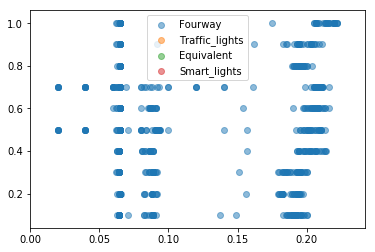

In [5]:
# set some parameters :


cross_dict = {'Fourway':fourway, 'Traffic_lights':traffic_lights, 'Equivalent':equivalent,'Smart_lights': smart_lights}
#print(cross_dict)
for key in cross_dict.keys():
    through = [x[0] for x in cross_dict[key]]
    p = [z[1] for z in cross_dict[key]]
    plt.scatter(p,through, alpha = .5, label = key)
        
plt.legend()
plt.show()

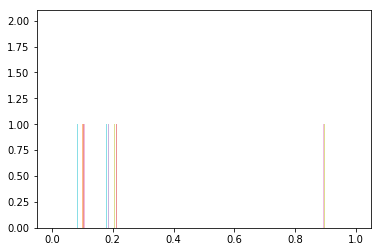

In [6]:
for key in cross_dict.keys():
    plt.hist(cross_dict[key],bins = 50, label = key, alpha = .5)

/home/lau/anaconda2/envs/py36/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


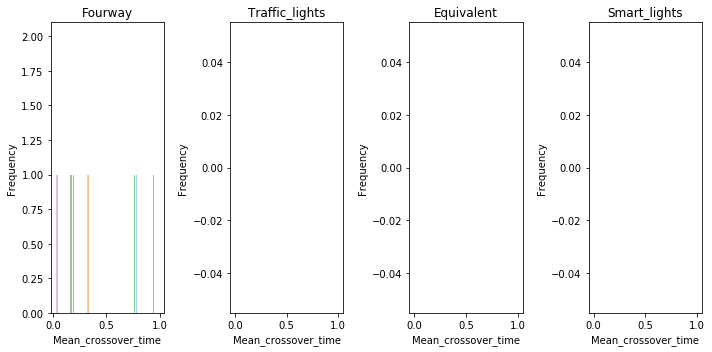

In [7]:
fig, axs = plt.subplots(1, 4,figsize = (10,5), sharey=False, tight_layout=True)

keys = list(cross_dict.keys())

for key in cross_dict.keys():
    ind = keys.index(key)
    axs[ind].hist(cross_dict[key],bins = 15, label = key, alpha = .5)
    axs[ind].set_title(key)
    axs[ind].set_ylabel('Frequency')
    axs[ind].set_xlabel('Mean_crossover_time')

In [8]:
keys = list(cross_dict.keys())

for key in cross_dict.keys():
    plt.scatter()

TypeError: scatter() missing 2 required positional arguments: 'x' and 'y'